In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
class K_Means:
    def __init__(self, k = 3, tol = 1e-05, itermax = 100):
        self.k = k
        self.tol = tol # set variable for stopping tolerance here
        self.itermax = itermax # set variable for maximum iterations here

    def fit(self, data):
        self.centroids = {}

        # Initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i] # Fill in the centroid variable on the left side

        # Begin iterations
        for j in range(self.itermax): # Fill in variable for maximum no. of iterations
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            # Find the distance between the point and cluster; choose the nearest centroid
            for features in data:
            # Fill in the correct np function for calculating norm below
                distances = [np.linalg.norm(features- self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                # Fill in the correct np function for calculating average below
                self.centroids[classification] = np.average(self.classes[classification], axis = 0) 

            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - centroid)/original_centroid * 100.0) > self.tol:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

#    def pred(self, data):
#       distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
#        classification = distances.index(min(distances))
#        return classification

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


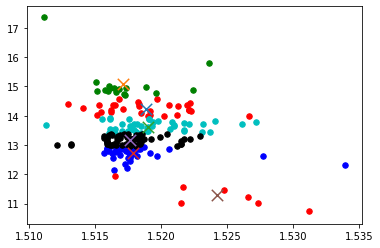

In [6]:
def main():
    # Read data from CSV file
    filename_glass = 'glass.csv'
    df_glass = pd.read_csv(filename_glass)
 
    print(df_glass.shape)
    display(df_glass.head(2))
    
    # Copy data into a 2D array
    X = df_glass.iloc[:, 0:2].values  
    #print(X.shape)
    #print(X)
    
    km = K_Means(6)
    km.fit(X)

    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

   
    
    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)
    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")
    

    plt.show()

if __name__ == "__main__":
    main()